In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from matplotlib.patches import Ellipse
from sklearn.datasets.samples_generator import make_blobs 
X,y_true = make_blobs(n_samples=100,centers =4,cluster_std=0.60,random_state=0) 
X=X[:, ::-1]

#flip axes for better plotting




[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


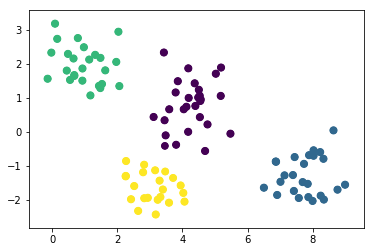

In [6]:
gmm = GaussianMixture(n_components=4).fit(X) 
labels=gmm.predict(X)
plt.scatter(X[:,0], X[:,1],c=labels, s=40,cmap='viridis')

probs = gmm.predict_proba(X) 
print(probs[:5].round(3))
size = 50 * probs.max(1) ** 2                                             
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

def draw_ellipse(position, covariance, ax=None, **kwargs):
    Ax = ax or plt.gca()
    if covariance.shape()==2:
        U, s, Vt = np.linalg.svd(covariance)
        Angle = np.degrees(np.arctan2(U[1, 0], U[0,0]))
        Width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height  = 2 * np.sqrt(covariance)

#Draw the Ellipse
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig * width, nsig *height, angle, **kwargs))


def plot_gmm(gmm,X,label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
gmm = GaussianMixture(n_components=4, random_state=42)


# K MEANS

     Driver_ID  Distance_Feature  Speeding_Feature
0   3423311935             71.24                28
1   3423313212             52.53                25
2   3423313724             64.54                27
3   3423311373             55.69                22
4   3423310999             54.58                25
5   3423313857             41.91                10
6   3423312432             58.64                20
7   3423311434             52.02                 8
8   3423311328             31.25                34
9   3423312488             44.31                19
10  3423311254             49.35                40
11  3423312943             58.07                45
12  3423312536             44.22                22
13  3423311542             55.73                19
14  3423312176             46.63                43
15  3423314176             52.97                32
16  3423314202             46.25                35
17  3423311346             51.55                27
18  3423310666             57.0

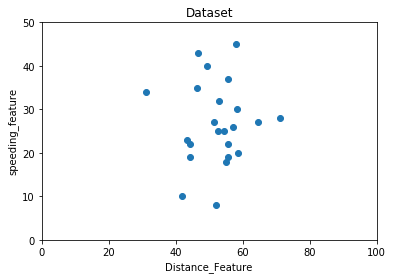

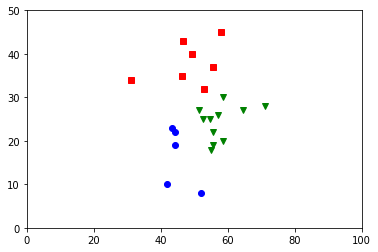

In [10]:
from sklearn.cluster import KMeans
#from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("kmeansdata.csv")
df1=pd.DataFrame(data)
print(df1)
f1 = df1['Distance_Feature'].values
f2 = df1['Speeding_Feature'].values
X=np.matrix(list(zip(f1,f2)))
plt.plot()
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.title('Dataset')
plt.ylabel('speeding_feature')
plt.xlabel('Distance_Feature')
plt.scatter(f1,f2)
plt.show()
plt.plot()                                 #create new plot and              
colors = ['b', 'g', 'r'] 
markers = ['o', 'v', 's']

#  KMeans algorithm     K = 3

kmeans_model = KMeans(n_clusters=3).fit(X)
plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 100])
    plt.ylim([0, 50])
plt.show()
